<center><header><b>Predicting House Price using Regression Model</b></header></center>

<b>Steps for Regression Modelling:</b>

1. <b>Business Problem Definition</b> - How to predict House Price Factor based on Attributes with defined factors
2. <b>Convert business problem</b> Into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. <b>Finding the right technique</b> - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other Machine Learning techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. <b>Data colletion(Y, X)</b> - Identify the sources of information and collect the data
5. <b>Consolidate the data</b> - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. <b>Data preparation for modeling</b> (create data audit report to identify the steps to perform as part of data preparation)
    a. missinmg value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. <b>Basic assumptions</b> (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)

In [46]:
##Import packages

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import pandas_profiling
import scipy.stats as stats
import sklearn as sk
import statsmodels as sm

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

### Pre-Modelling

#### Data Audit

In [47]:
## Import Train and Test Data

House_Price_Test = pd.read_csv('H:/Machine Learning/7. Kaggle - Competition Data/House Prices Advanced Regression Techniques/test.csv')
House_Price_Train =  pd.read_csv('H:/Machine Learning/7. Kaggle - Competition Data/House Prices Advanced Regression Techniques/train.csv')

In [48]:
House_Price_Test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [49]:
House_Price_Train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### We have both Train & Test Data(Without Y Value) - Hence Data Preparation will be iplemented in Both the DataSets upto Modelling Stage

In [50]:
## Check Missing Value

a = sum(House_Price_Train.isnull().sum())
b = sum(House_Price_Test.isnull().sum())
print('Missing values in Train Dats is {} and Test Data is {}'.format(a,b))

Missing values in Train Dats is 6965 and Test Data is 7000


In [51]:
## Check Data Type

House_Price_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [52]:
House_Price_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [53]:
## Shape of Data

print('Shape of Train Data is {} and Test Data is {}'.format(House_Price_Train.shape,House_Price_Test.shape))

Shape of Train Data is (1460, 81) and Test Data is (1459, 80)


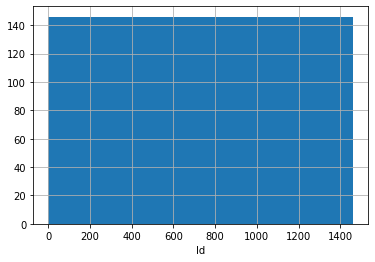

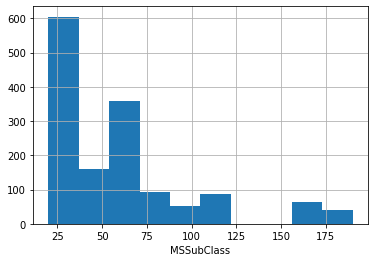

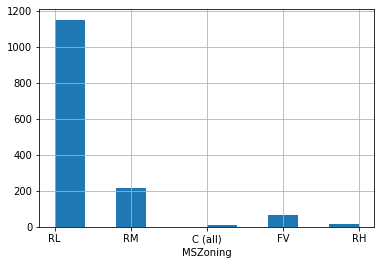

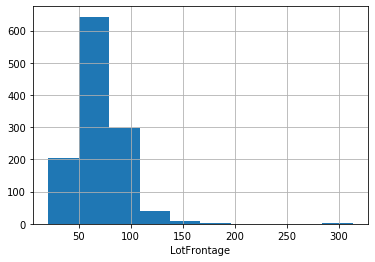

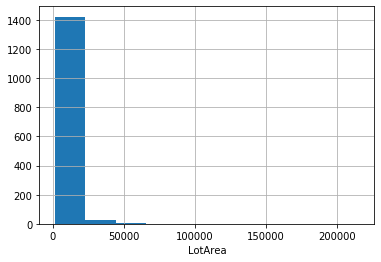

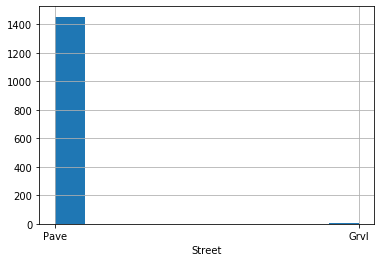

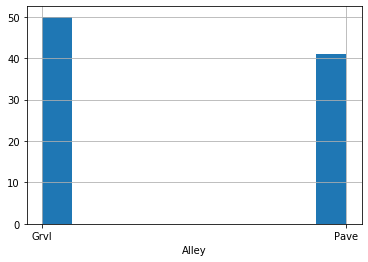

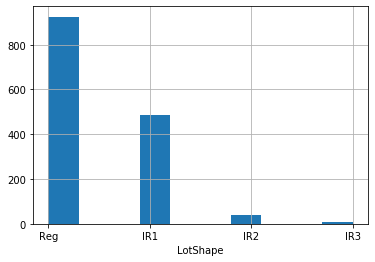

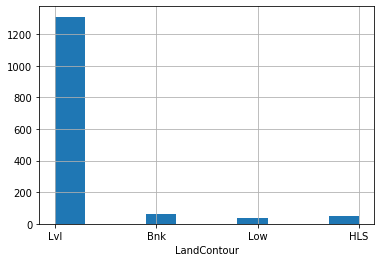

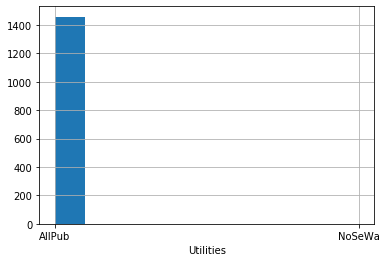

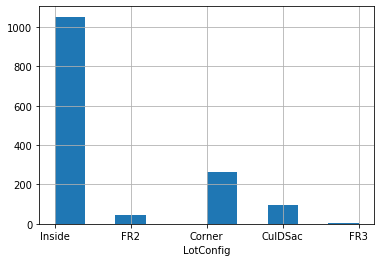

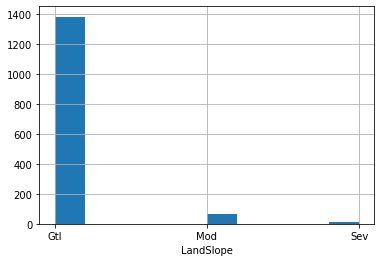

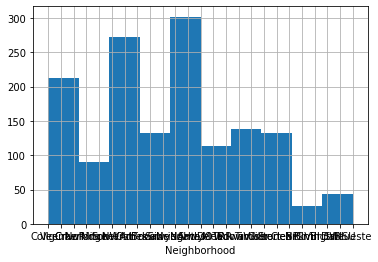

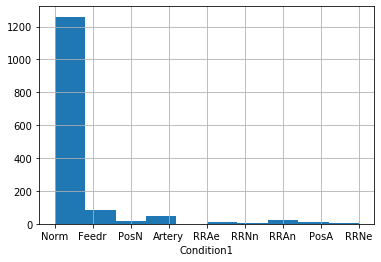

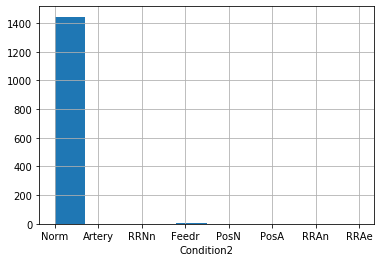

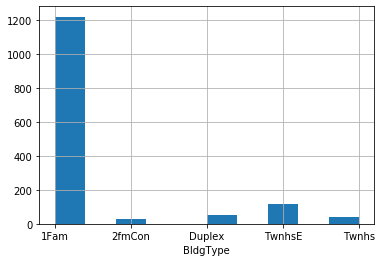

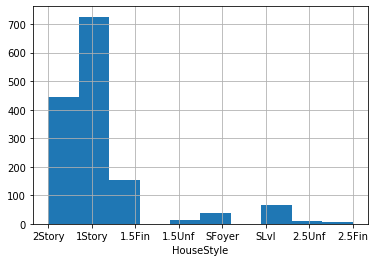

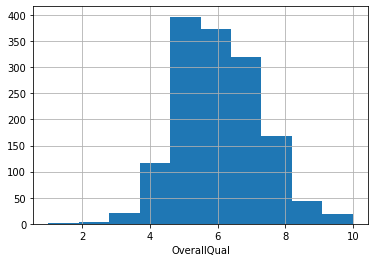

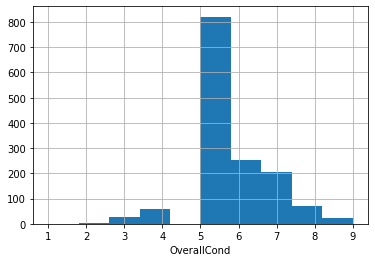

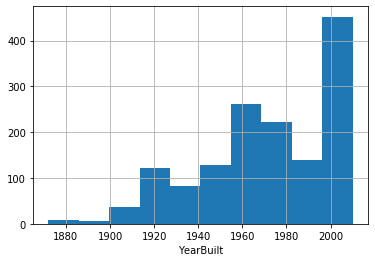

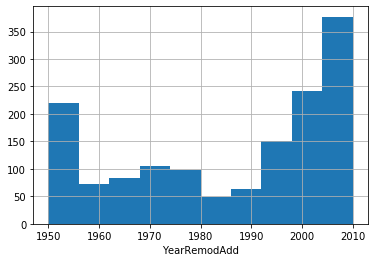

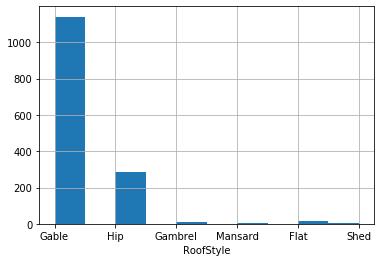

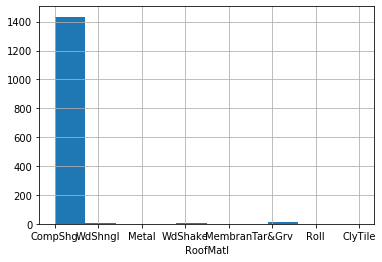

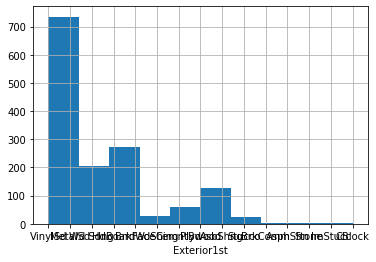

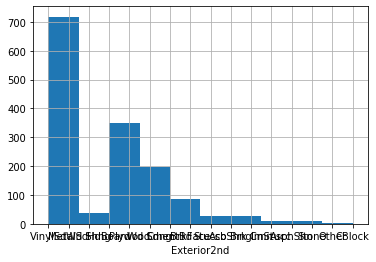

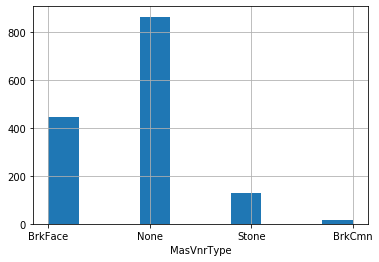

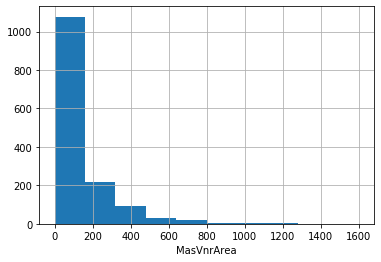

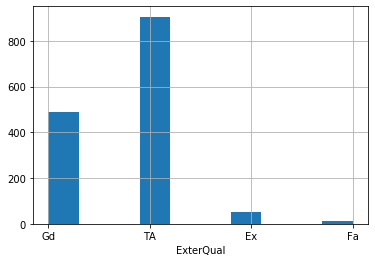

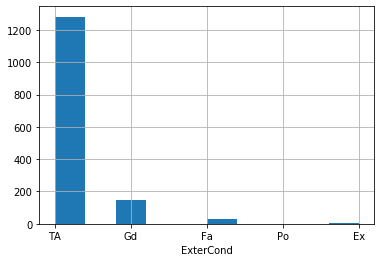

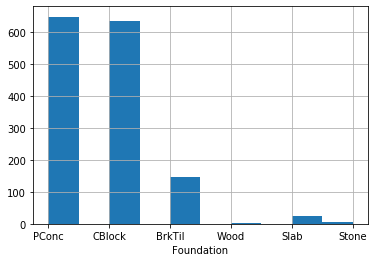

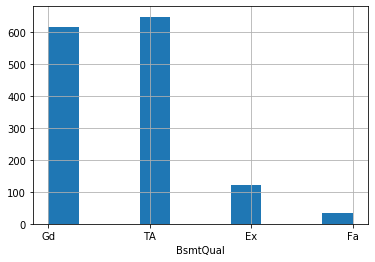

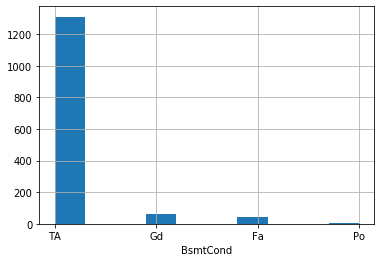

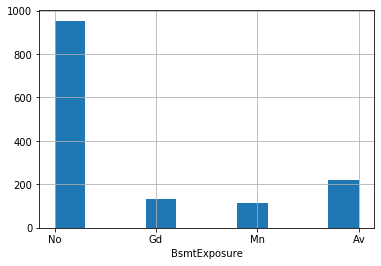

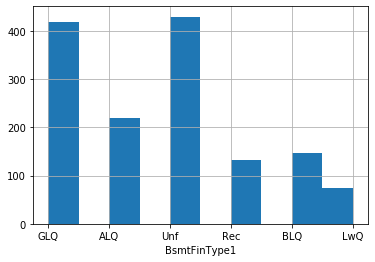

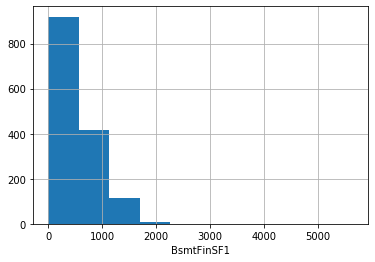

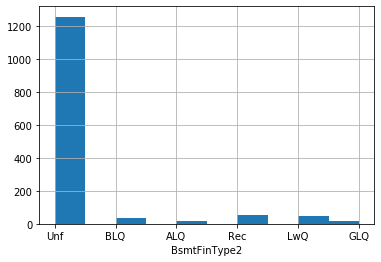

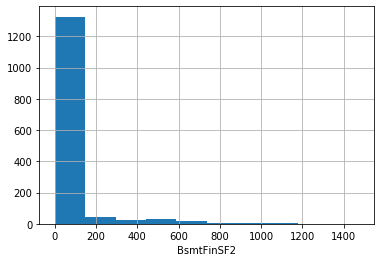

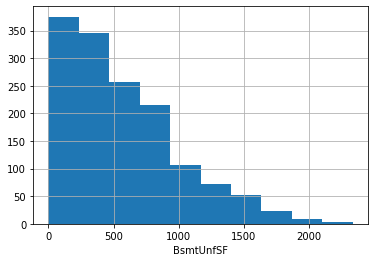

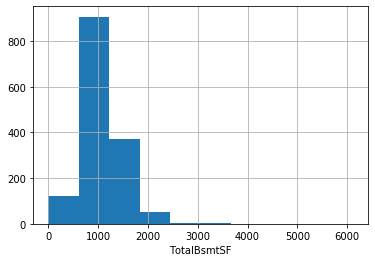

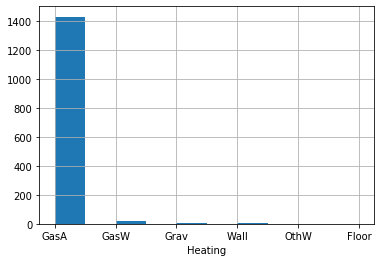

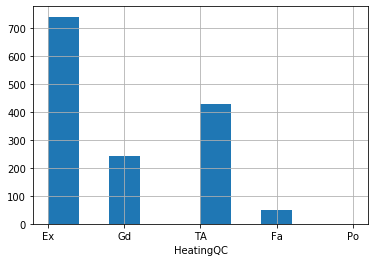

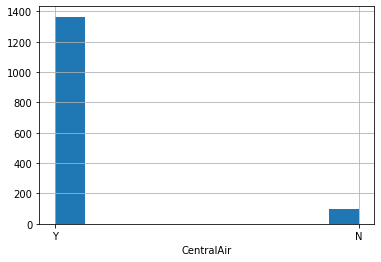

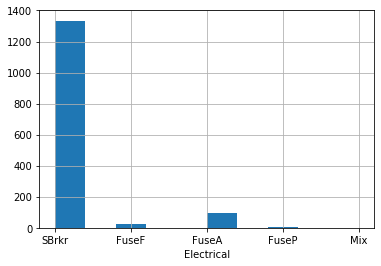

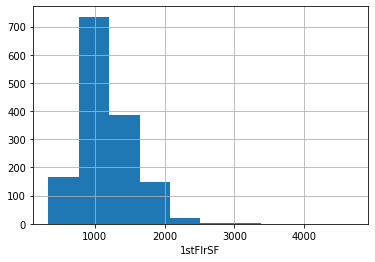

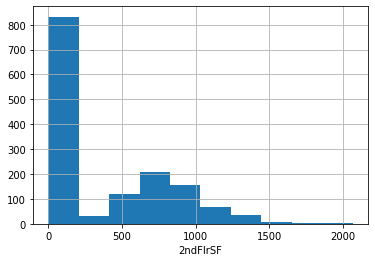

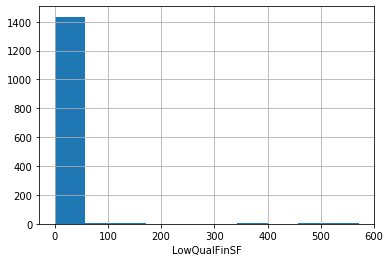

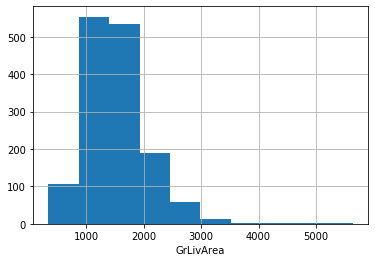

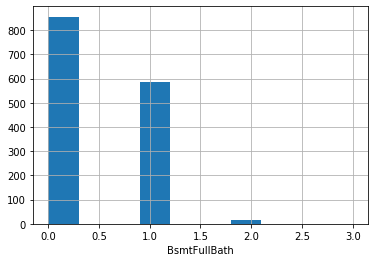

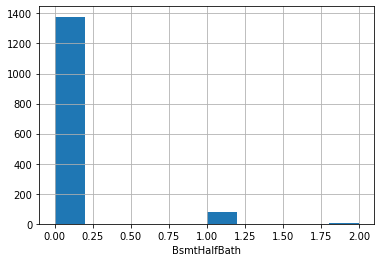

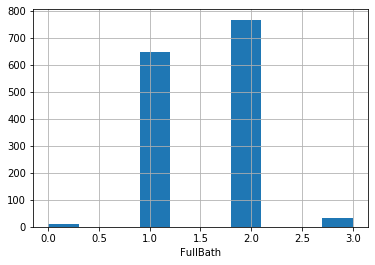

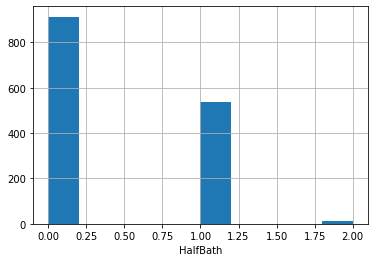

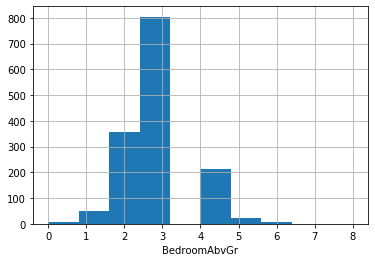

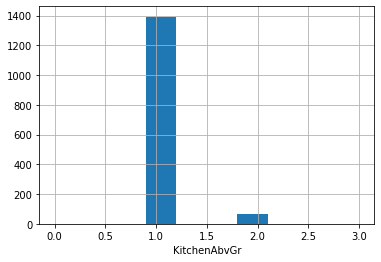

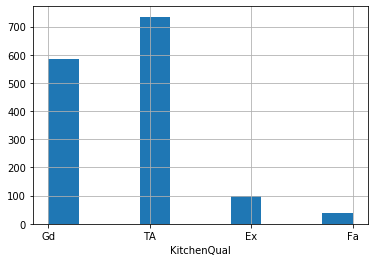

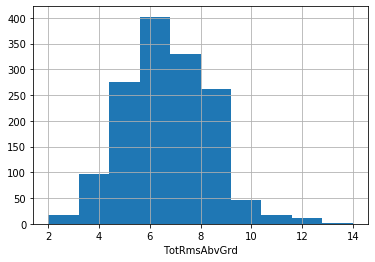

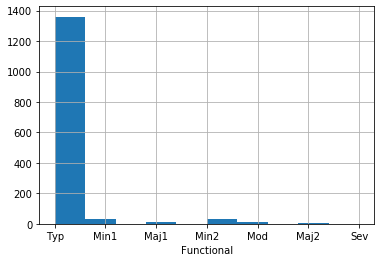

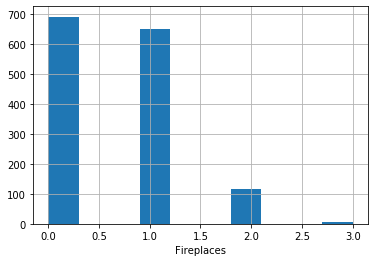

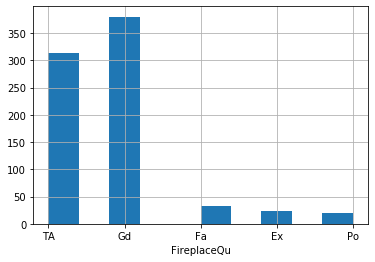

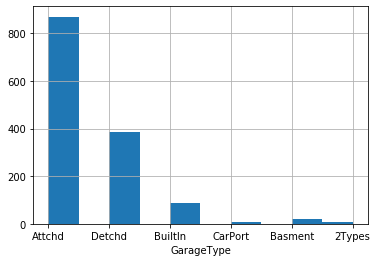

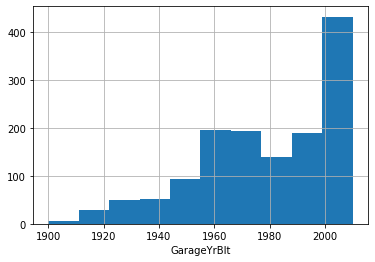

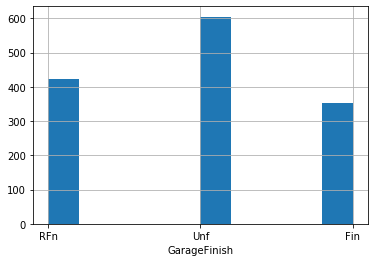

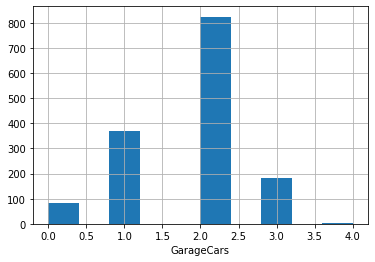

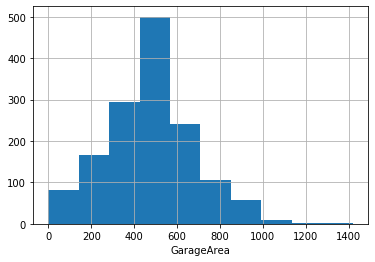

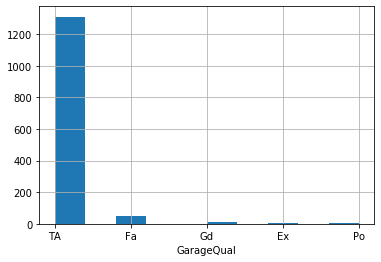

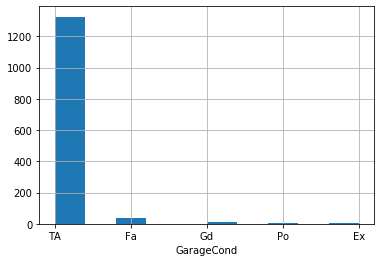

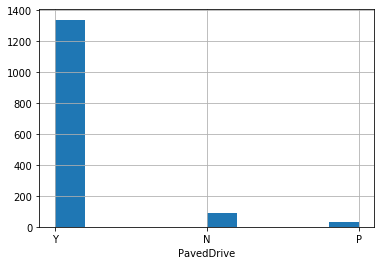

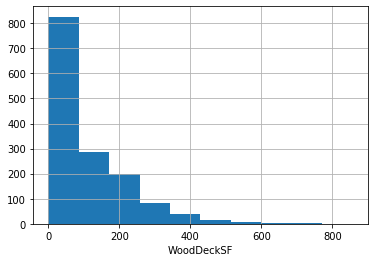

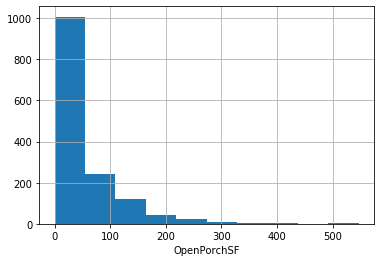

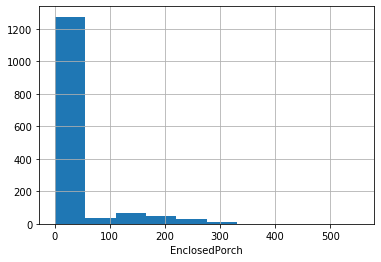

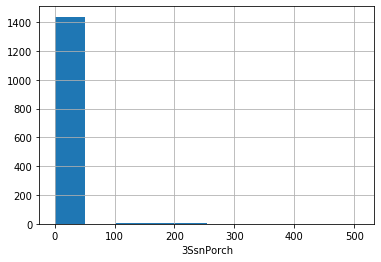

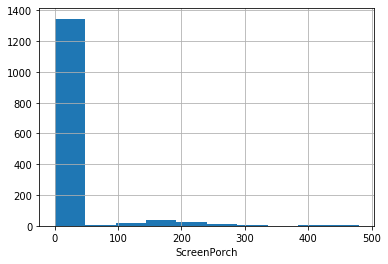

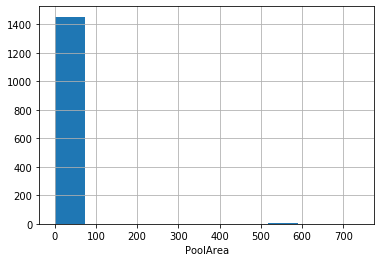

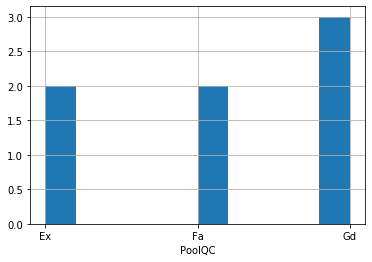

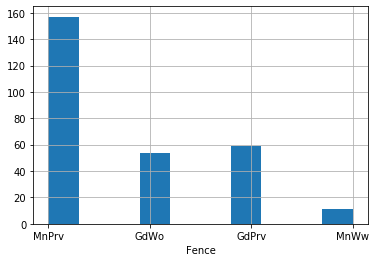

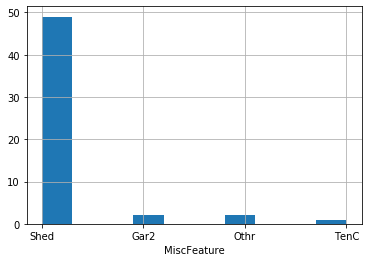

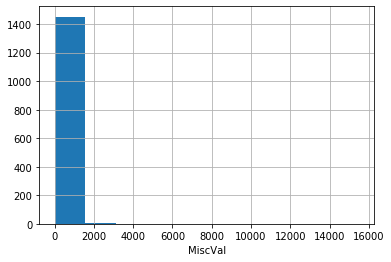

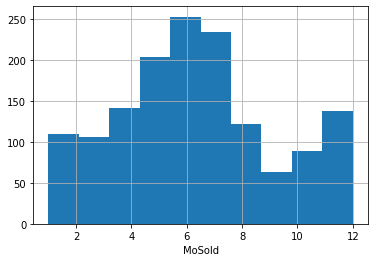

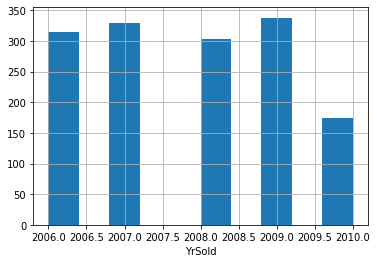

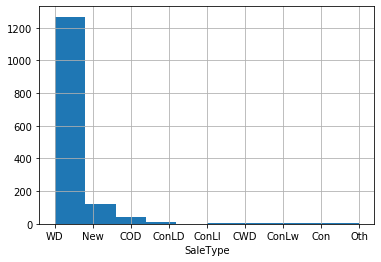

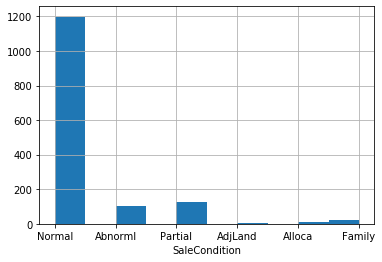

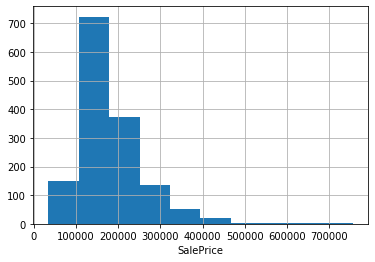

In [54]:
##Data Analysis using Bar Plot

for x in House_Price_Train.columns:
    House_Price_Train[x].hist()
    plt.xlabel(str(x))
    plt.show()

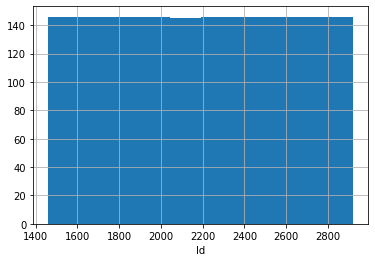

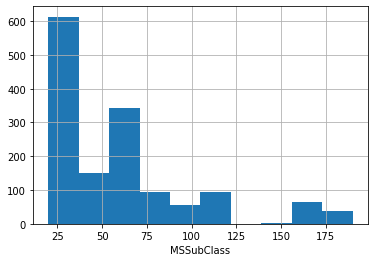

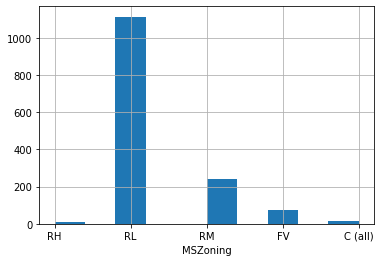

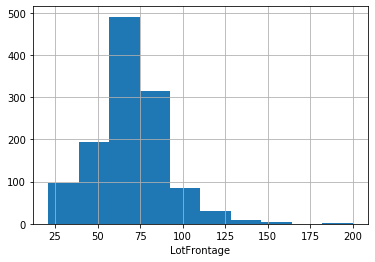

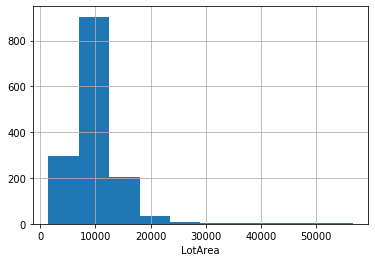

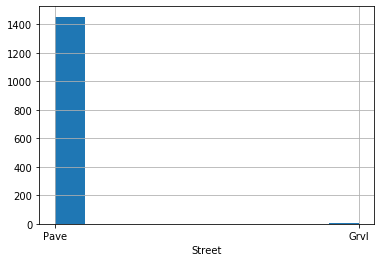

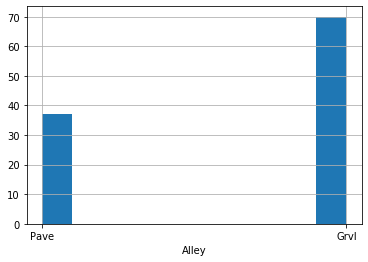

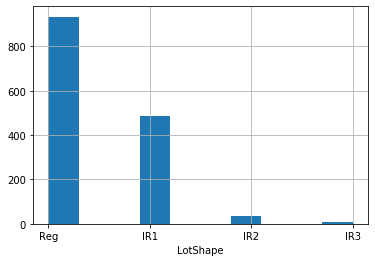

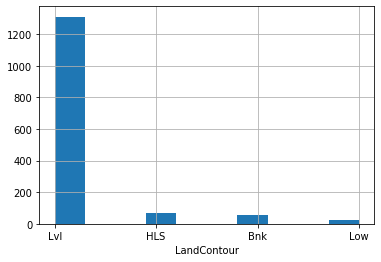

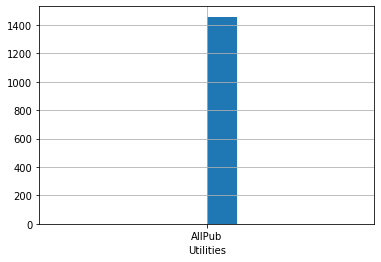

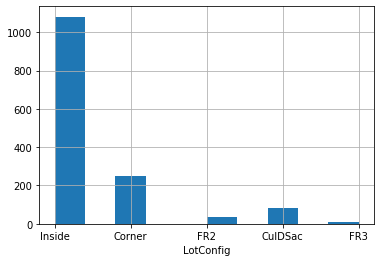

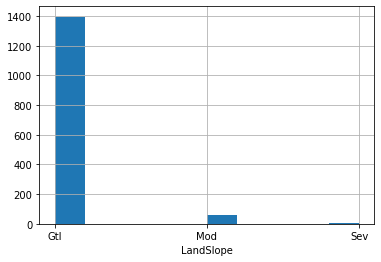

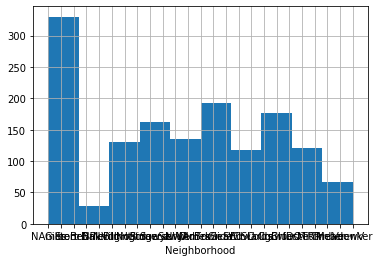

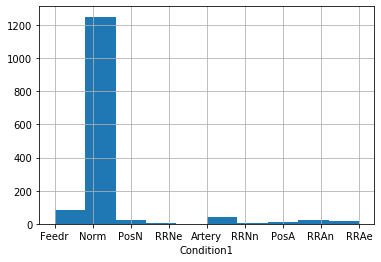

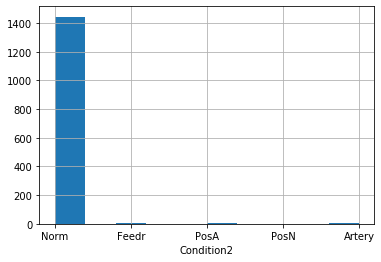

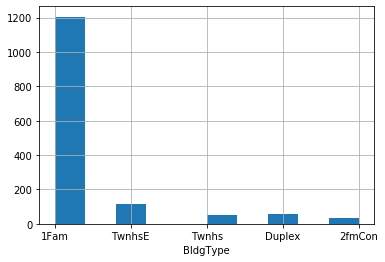

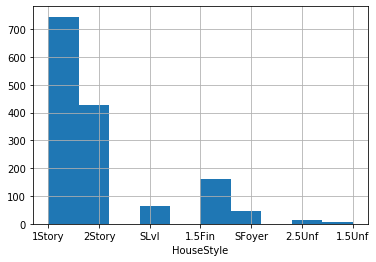

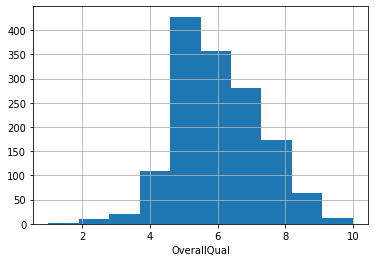

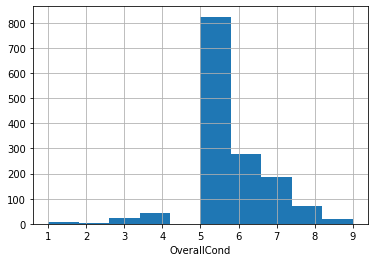

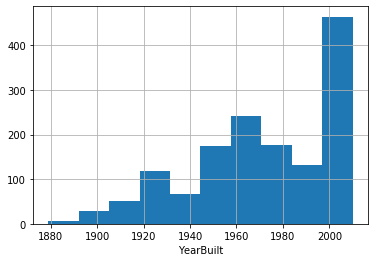

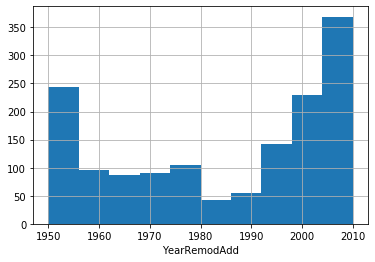

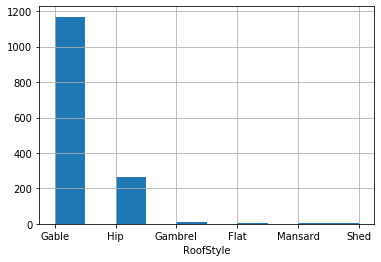

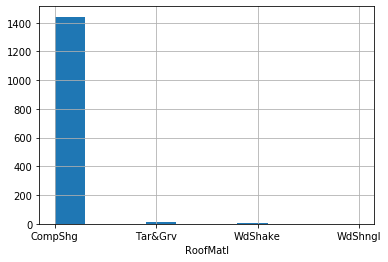

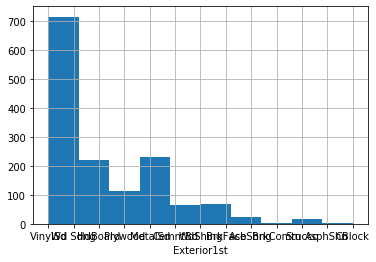

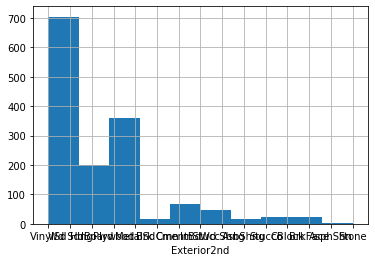

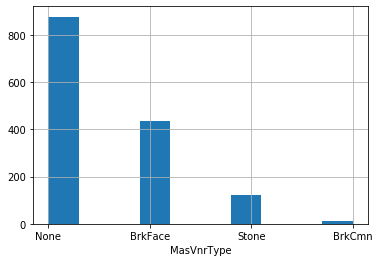

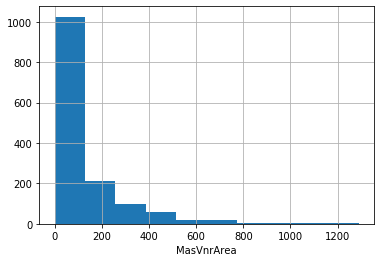

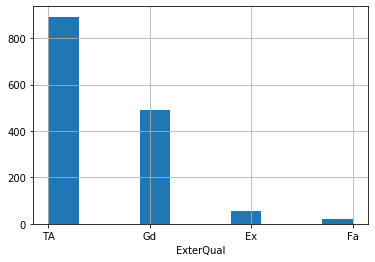

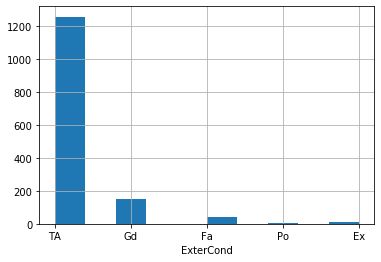

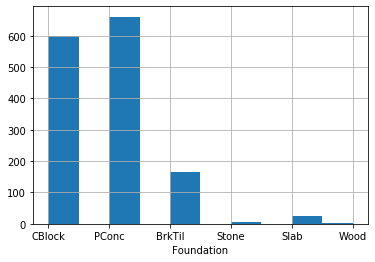

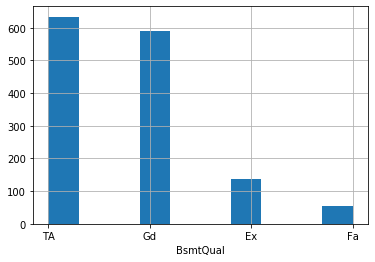

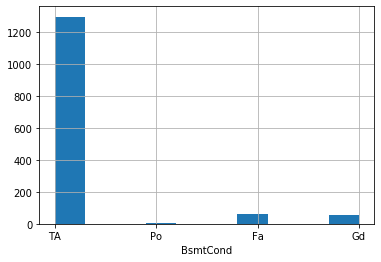

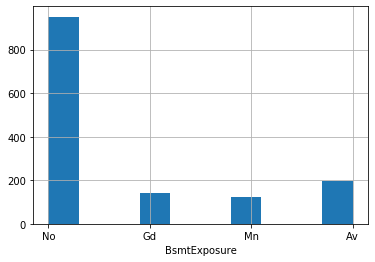

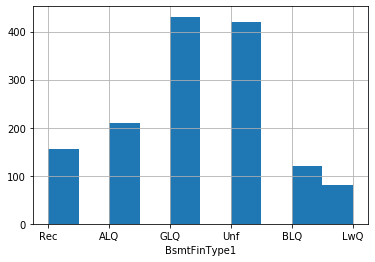

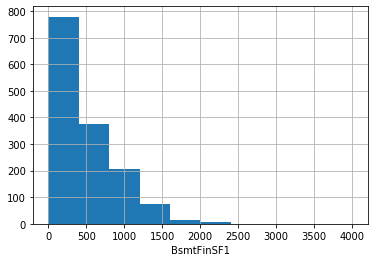

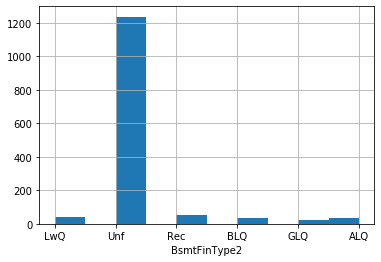

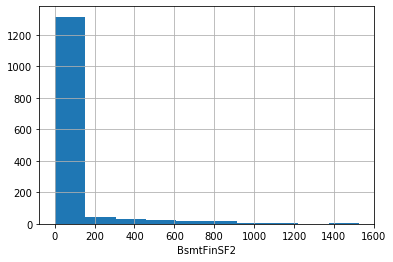

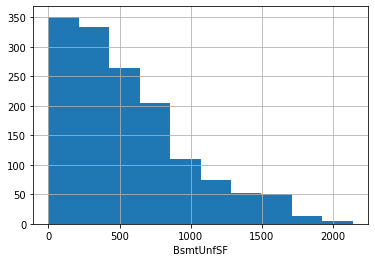

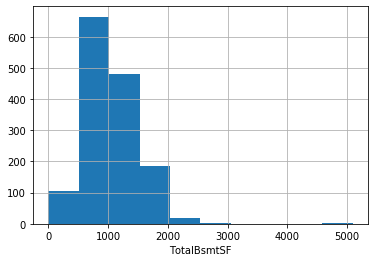

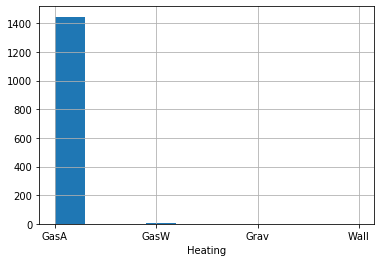

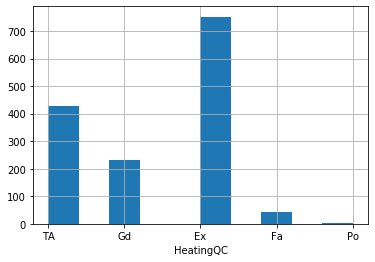

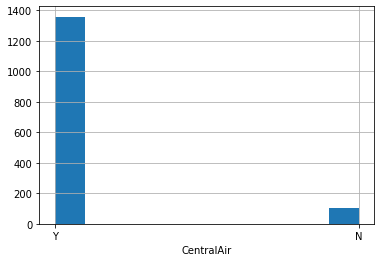

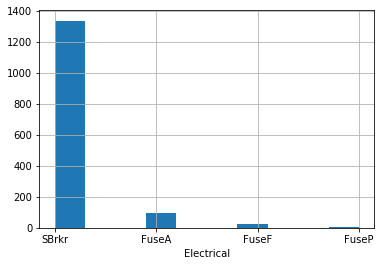

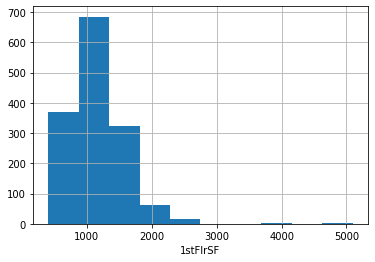

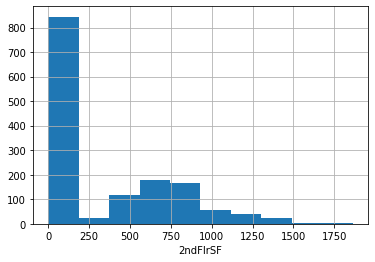

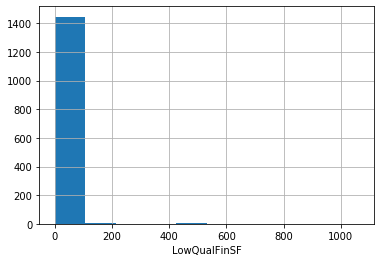

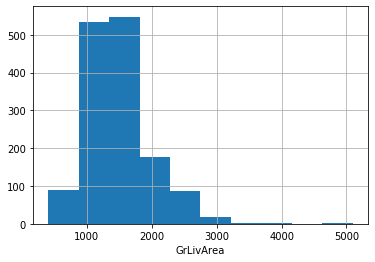

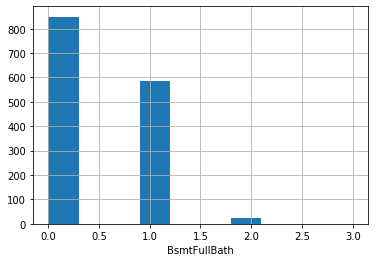

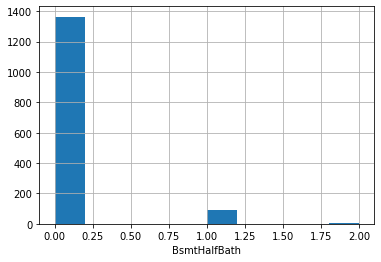

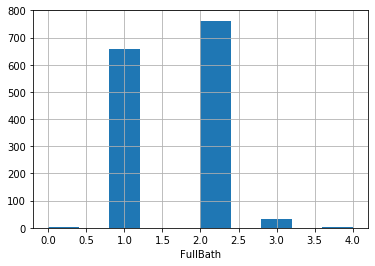

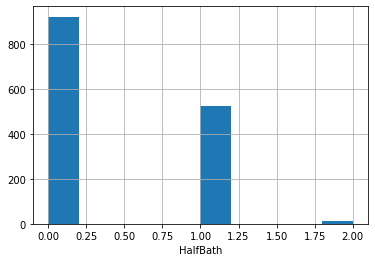

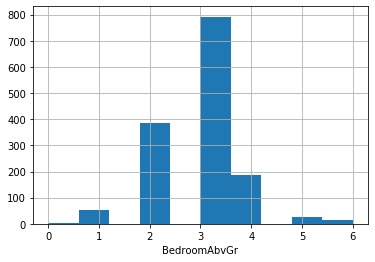

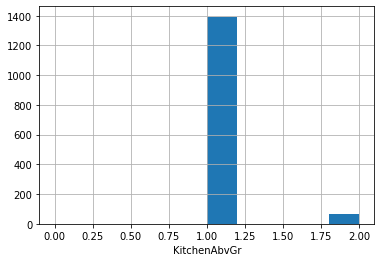

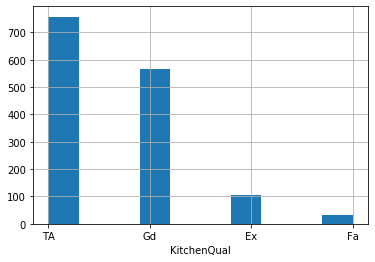

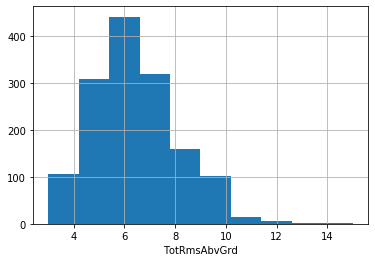

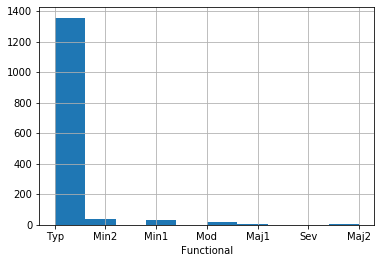

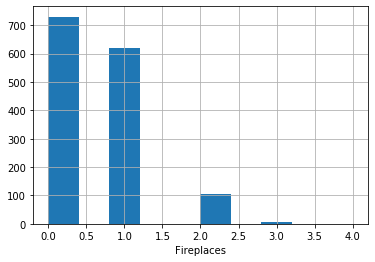

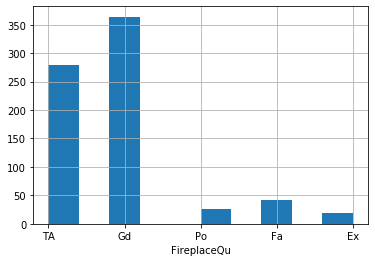

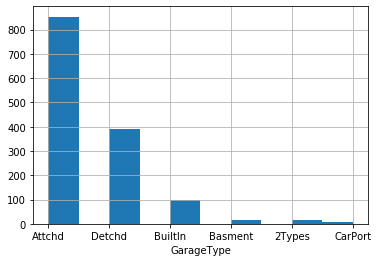

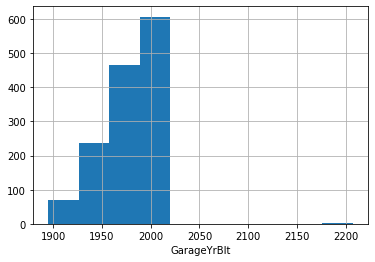

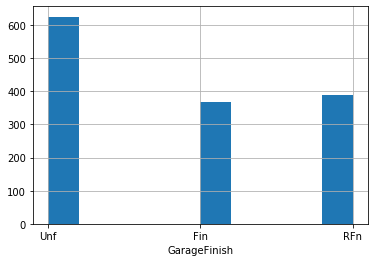

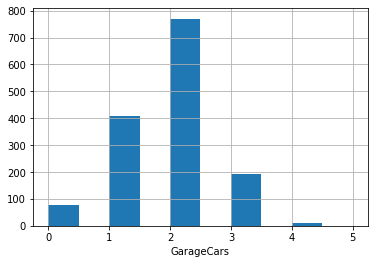

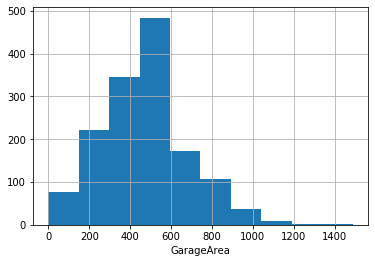

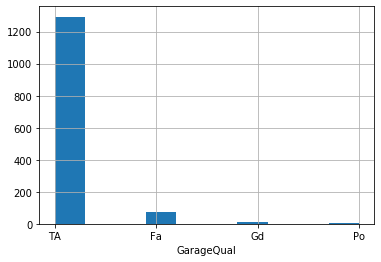

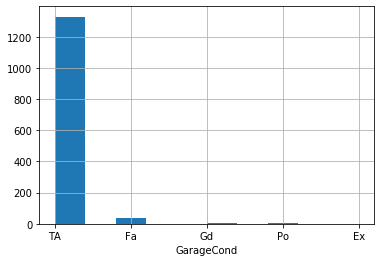

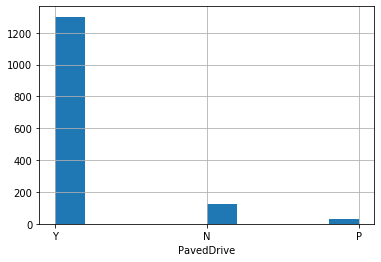

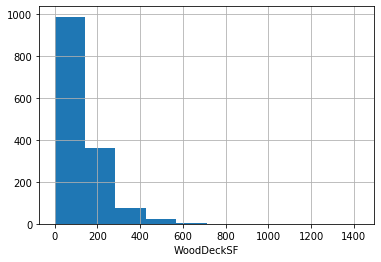

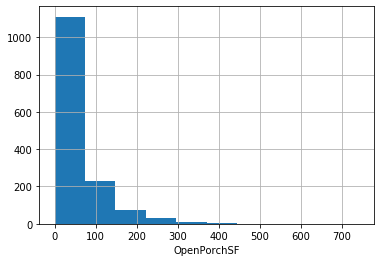

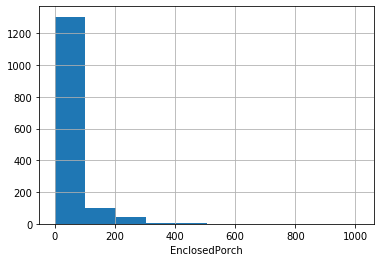

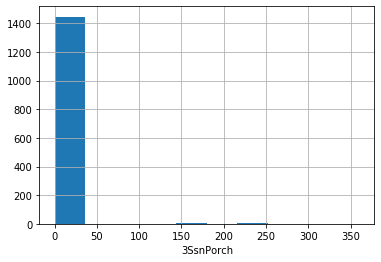

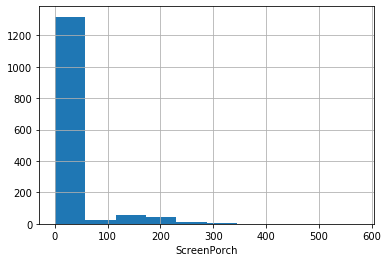

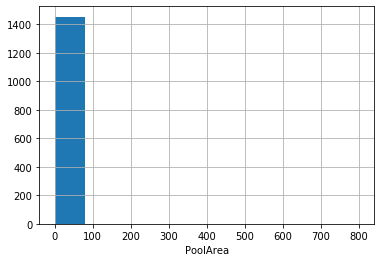

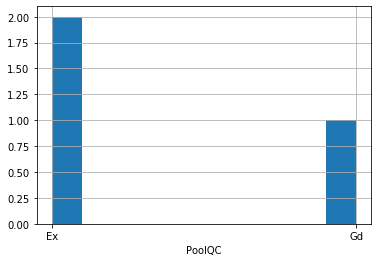

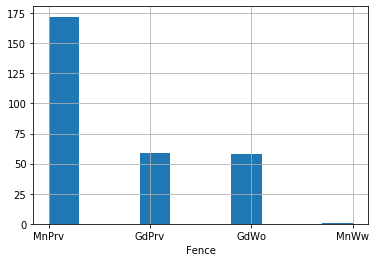

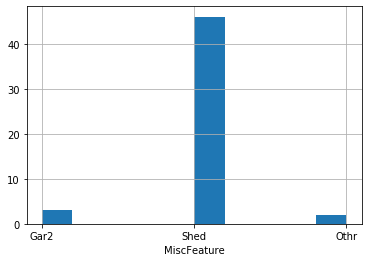

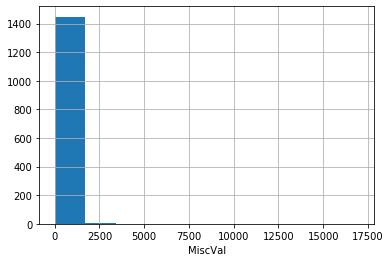

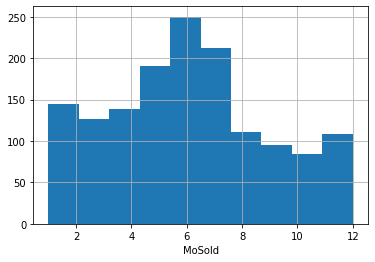

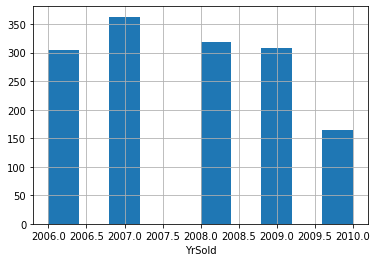

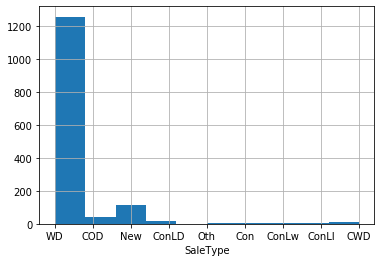

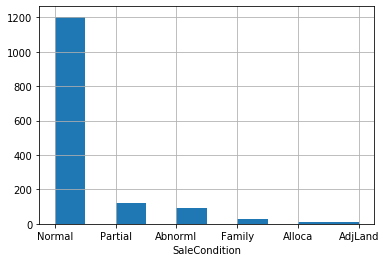

In [55]:
for x in House_Price_Test.columns:
    House_Price_Test[x].hist()
    plt.xlabel(str(x))
    plt.show()

In [56]:
###Generate Profile Report

pandas_profiling.ProfileReport(House_Price_Train)

In [57]:
pandas_profiling.ProfileReport(House_Price_Test)

In [58]:
##Deleting Columns with Missing Values > 0.25

House_Price_Train = House_Price_Train.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']) 
House_Price_Test = House_Price_Test.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']) 

### Data Visualization

ValueError: Invalid RGBA argument: 't'

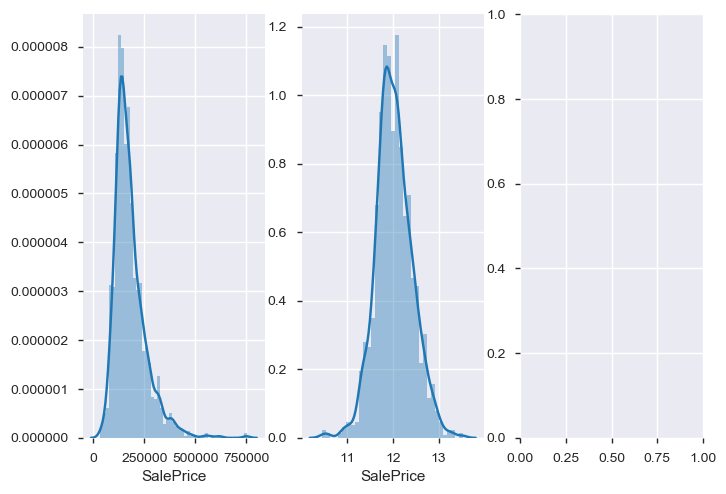

In [83]:
plt.subplot(1,3,1)
sns.distplot(House_Price_Train.SalePrice)

plt.subplot(1,3,2)
sns.distplot(np.log(House_Price_Train.SalePrice))

plt.subplot(1,3,3)
sns.distplot(np.sqrt(House_Price_Train.SalePrice),color=)

#As we can verify the Distribution is more symetric in Log derivation of Sales Price

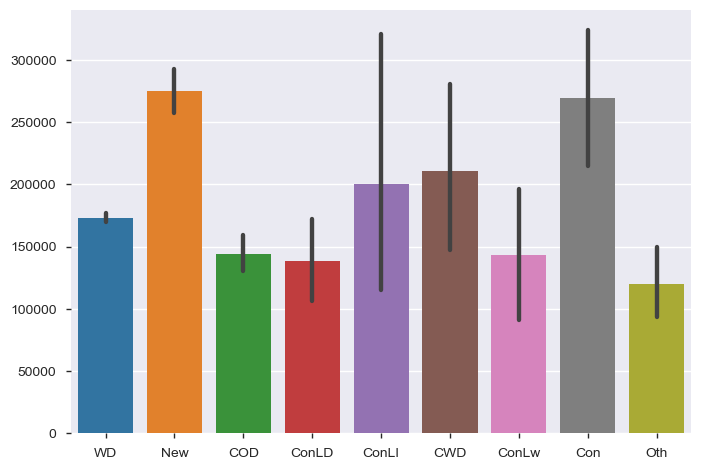

In [78]:
x_axis = [x for x in House_Price_Train.SaleType]
y_axis = [x for x in House_Price_Train.SalePrice]
sns.barplot(x_axis,y_axis)
plt.show()

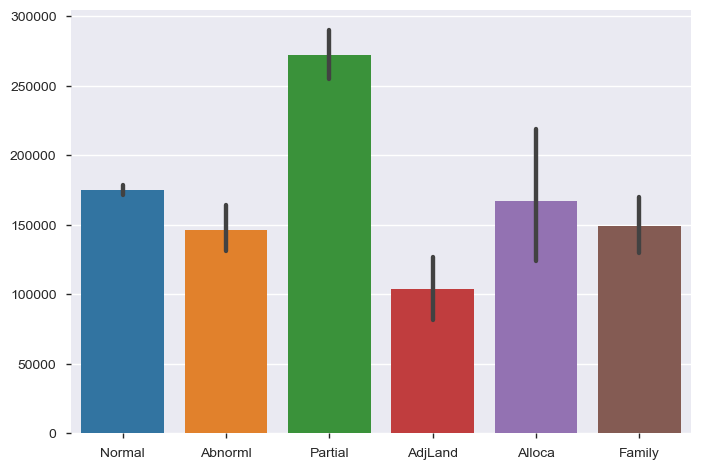

In [79]:
## Sales Condition

x_axis = [x for x in House_Price_Train.SaleCondition]
y_axis = [x for x in House_Price_Train.SalePrice]
sns.barplot(x_axis,y_axis)

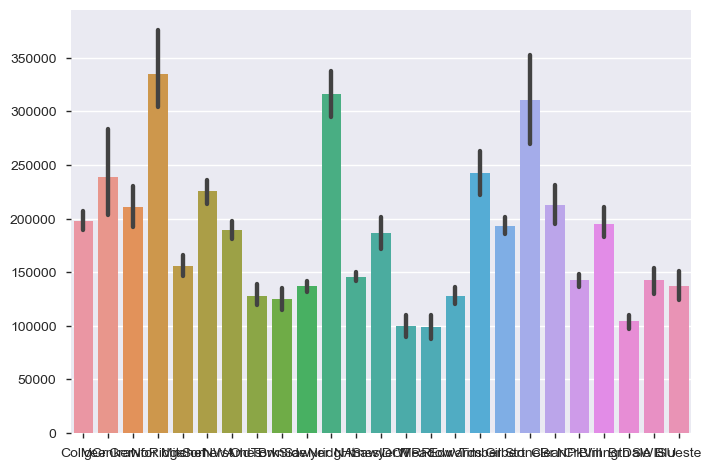

In [80]:
##Neighbourhood

x_axis = [x for x in House_Price_Train.Neighborhood]
y_axis = [x for x in House_Price_Train.SalePrice]
sns.barplot(x_axis,y_axis)

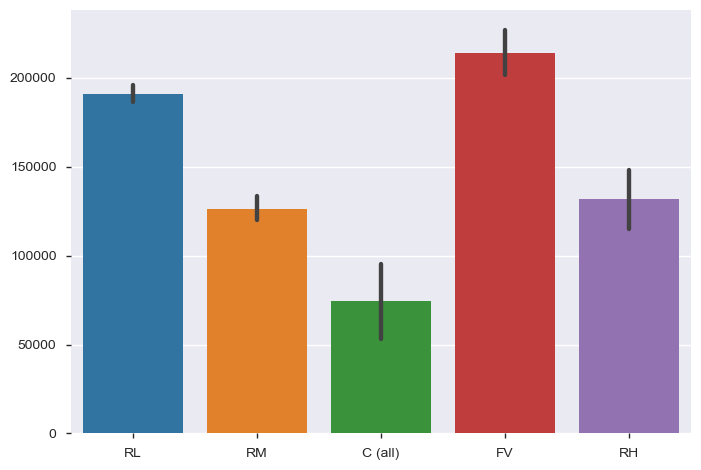

In [81]:
##Zone

x_axis = [x for x in House_Price_Train.MSZoning]
y_axis = [x for x in House_Price_Train.SalePrice]
sns.barplot(x_axis,y_axis)

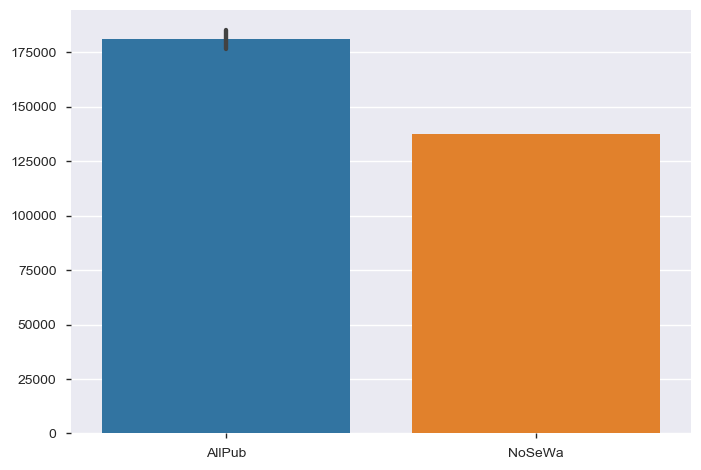

In [82]:
##Utilitues
x_axis = [x for x in House_Price_Train.Utilities]
y_axis = [x for x in House_Price_Train.SalePrice]
sns.barplot(x_axis,y_axis)